## Train a simple convnet on the Fashion MNIST dataset

In this, we will see how to deal with image data and train a convnet for image classification task.

### Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [98]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [99]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

### Find no.of samples are there in training and test datasets

In [100]:
import numpy as np
from keras.utils import to_categorical
import matplotlib.pyplot as plt
%matplotlib inline

print('Training data shape : ', x_train.shape, y_train.shape)

print('Testing data shape : ', x_test.shape, y_test.shape)

# Find the unique numbers from the train labels
classes = np.unique(y_train)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)
Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


In [101]:
##60000 represents the number of images in the train dataset and (28, 28) represents the size of the image: 28 x 28 pixel

### Find dimensions of an image in the dataset

5


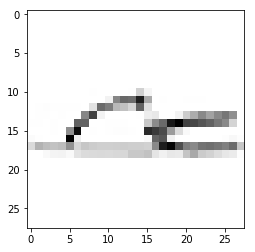

In [102]:



image_index = 7777 # You may select anything up to 60,000

print(y_train[image_index]) # The label is 8

plt.imshow(x_train[image_index], cmap='Greys')

### Convert train and test labels to one hot vectors

** check `keras.utils.to_categorical()` **

In [104]:
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(y_train)
test_Y_one_hot = to_categorical(y_test)

# Display the change for category label using one-hot encoding
print('Original label:', y_train[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

y_train=train_Y_one_hot
y_test=test_Y_one_hot

Original label: 9
After conversion to one-hot: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [105]:
#from keras.utils.np_utils import to_categorical
#y_train= to_categorical(y_train)

### Normalize both the train and test image data from 0-255 to 0-1

In [107]:

# Reshaping the array to 4-dims so that it can work with the Keras API

x_train = x_train.reshape(-1, 28,28, 1)
x_test = x_test.reshape(-1, 28,28, 1)
x_train.shape, x_test.shape

input_shape = (28, 28, 1)

# Making sure that the values are float so that we can get decimal points after division

x_train = x_train.astype('float32')

x_test = x_test.astype('float32')

# Normalizing the RGB codes by dividing it to the max RGB value.

x_train /= 255

x_test /= 255

print('x_train shape:', x_train.shape)

print('Number of images in x_train', x_train.shape[0])

print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


### Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras

In [84]:
#done above

### Import the necessary layers from keras to build the model

In [108]:
# Importing the required Keras modules containing model and layers

import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU



### Build a model 

** with 2 Conv layers having `32 3*3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with early stopping `patience=5` and no.of `epochs=10`. **

In [109]:
batch_size = 64
epochs = 20
num_classes = 10

In [110]:
fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(28,28,1),padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2, 2),padding='same'))
fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(Dense(num_classes, activation='softmax'))

In [112]:
#compile model
fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
fashion_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 32, 28, 1)         8096      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 32, 28, 1)         0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 32, 14, 1)         0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 64, 14, 1)         18496     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 64, 14, 1)         0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 64, 7, 1)          0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 128, 7, 1)         73856     
__________

In [114]:
#fit the model

from sklearn.model_selection import train_test_split
train_X,valid_X,train_label,valid_label = train_test_split(x_train, train_Y_one_hot, test_size=0.2, random_state=13)

fashion_train = fashion_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 33s 682us/step - loss: 0.5902 - acc: 0.7808 - val_loss: 0.4345 - val_acc: 0.8470
Epoch 2/20
48000/48000 [==============================] - 32s 661us/step - loss: 0.3726 - acc: 0.8655 - val_loss: 0.3751 - val_acc: 0.8674
Epoch 3/20
48000/48000 [==============================] - 33s 685us/step - loss: 0.3281 - acc: 0.8801 - val_loss: 0.3251 - val_acc: 0.8822
Epoch 4/20
48000/48000 [==============================] - 33s 684us/step - loss: 0.2996 - acc: 0.8880 - val_loss: 0.3098 - val_acc: 0.8877
Epoch 5/20
48000/48000 [==============================] - 33s 687us/step - loss: 0.2786 - acc: 0.8962 - val_loss: 0.3062 - val_acc: 0.8882
Epoch 6/20
48000/48000 [==============================] - 33s 689us/step - loss: 0.2631 - acc: 0.9009 - val_loss: 0.3130 - val_acc: 0.8859
Epoch 7/20
48000/48000 [==============================] - 33s 689us/step - loss: 0.2499 - acc: 0.9064 - val_loss: 0.

### Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [115]:

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

fashion_train = fashion_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 32s 673us/step - loss: 0.1040 - acc: 0.9602 - val_loss: 0.3903 - val_acc: 0.8982
Epoch 2/20
48000/48000 [==============================] - 33s 688us/step - loss: 0.0962 - acc: 0.9630 - val_loss: 0.3927 - val_acc: 0.9021
Epoch 3/20
48000/48000 [==============================] - 34s 712us/step - loss: 0.0908 - acc: 0.9646 - val_loss: 0.3946 - val_acc: 0.9008
Epoch 4/20
48000/48000 [==============================] - 34s 704us/step - loss: 0.0875 - acc: 0.9653 - val_loss: 0.4231 - val_acc: 0.8993
Epoch 5/20
48000/48000 [==============================] - 32s 668us/step - loss: 0.0789 - acc: 0.9696 - val_loss: 0.4449 - val_acc: 0.8987
Epoch 6/20
48000/48000 [==============================] - 34s 715us/step - loss: 0.0769 - acc: 0.9698 - val_loss: 0.4551 - val_acc: 0.8976
Epoch 7/20
48000/48000 [==============================] - 33s 686us/step - loss: 0.0704 - acc: 0.9726 - val_loss: 0.

### Now, to the above model, lets add Data Augmentation 

### Import the ImageDataGenrator from keras and fit the training images

In [116]:

from keras.preprocessing.image import ImageDataGenerator

from keras import backend as K
K.set_image_dim_ordering('th')
# load data
datagen = ImageDataGenerator()
# fit parameters from data
datagen.fit(x_train)


C:\Users\RB00001\Anaconda2\2.2\Anaconda2\lib\site-packages\keras_preprocessing\image\image_data_generator.py:924: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_first" (channels on axis 1), i.e. expected either 1, 3 or 4 channels on axis 1. However, it was passed an array with shape (60000, 28, 28, 1) (28 channels).
  ' channels).')


#### Showing 5 versions of the first image in training dataset using image datagenerator.flow()

C:\Users\RB00001\Anaconda2\2.2\Anaconda2\lib\site-packages\keras_preprocessing\image\numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_first" (channels on axis 1), i.e. expected either 1, 3, or 4 channels on axis 1. However, it was passed an array with shape (1, 28, 28, 1) (28 channels).
  str(self.x.shape[channels_axis]) + ' channels).')


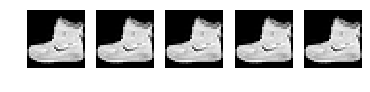

In [117]:
from matplotlib import pyplot as plt
gen = datagen.flow(x_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()

### Run the above model using fit_generator()

In [120]:
batches = datagen.flow(x_train, y_train, batch_size=64)
val_batches=datagen.flow(x_test, y_test, batch_size=64)

#fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
history=fashion_model.fit_generator(batches, batches.n, nb_epoch=1,validation_data=val_batches, nb_val_samples=val_batches.n)

#fashion_model.fit_generator(x=x_train,y=y_train, epochs=10)


Epoch 1/1
    2/60000 [..............................] - ETA: 1:17:40 - loss: 0.2473 - acc: 0.9688

C:\Users\RB00001\Anaconda2\2.2\Anaconda2\lib\site-packages\ipykernel_launcher.py:5: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  """
C:\Users\RB00001\Anaconda2\2.2\Anaconda2\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., 60000, validation_data=<keras_pre..., epochs=1, validation_steps=10000)`
  """


60000/60000 [==============================] - 2610s 44ms/step - loss: 0.0424 - acc: 0.9862 - val_loss: 0.9017 - val_acc: 0.8926


###  Report the final train and validation accuracy

In [121]:
# the first iteration with fit, we got close to 95 % accuracy. things did not improve much with dropout variable.25 this was 
#hovering around 98% .
# but when fit_generator is used, the accuracy is 98.62% and it does not go beyond that.

# the loss function  is quite mininal here .04 only


## **DATA AUGMENTATION ON CIFAR10 DATASET**

One of the best ways to improve the performance of a Deep Learning model is to add more data to the training set. Aside from gathering more instances from the wild that are representative of the distinction task, we want to develop a set of methods that enhance the data we already have. There are many ways to augment existing datasets and produce more robust models. In the image domain, these are done to utilize the full power of the convolutional neural network, which is able to capture translational invariance. This translational invariance is what makes image recognition such a difficult task in the first place. You want the dataset to be representative of the many different positions, angles, lightings, and miscellaneous distortions that are of interest to the vision task.

### **Import neessary libraries for data augmentation**

In [122]:
from __future__ import print_function
import keras
from keras.layers import Dense, Conv2D, BatchNormalization, Activation
from keras.layers import AveragePooling2D, Input, Flatten
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from keras.regularizers import l2
from keras import backend as K
from keras.models import Model
from keras.datasets import cifar10
import numpy as np
import os

### **Load CIFAR10 dataset**

In [132]:
# Load the CIFAR10 data.
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
# Normalize data.

x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
# Convert class vectors to binary class matrices.

y_train = keras.utils.to_categorical(y_train, num_classes)

y_test = keras.utils.to_categorical(y_test, num_classes)

# Input image dimensions.
input_shape = x_train.shape[1:]

In [133]:
print (input_shape)

(3, 32, 32)


### **Create a data_gen funtion to genererator with image rotation,shifting image horizontally and vertically with random flip horizontally.**

In [134]:
 datagen = ImageDataGenerator(

        # set input mean to 0 over the dataset
        featurewise_center=False,
        # set each sample mean to 0
        samplewise_center=False,
        # divide inputs by std of dataset
        featurewise_std_normalization=False,
        # divide each input by its std
        samplewise_std_normalization=False,
        # apply ZCA whitening
        zca_whitening=False,
        # epsilon for ZCA whitening
        zca_epsilon=1e-06,
        # randomly rotate images in the range (deg 0 to 180)
        rotation_range=0,
        # randomly shift images horizontally
        width_shift_range=0.1,
        # randomly shift images vertically
        height_shift_range=0.1,
        # set range for random shear
        shear_range=0.,
        # set range for random zoom
        zoom_range=0.,
        # set range for random channel shifts
        channel_shift_range=0.,
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        # value used for fill_mode = "constant"
        cval=0.,
        # randomly flip images
        horizontal_flip=True,
        # randomly flip images
        vertical_flip=False,
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

### **Prepare/fit the generator.**

In [135]:
model.compile(loss='categorical_crossentropy',

              optimizer=Adam(lr=1e-3),

              metrics=['accuracy'])

datagen.fit(x_train)

### **Generate 5 images for 1 of the image of CIFAR10 train dataset.**